<a href="https://colab.research.google.com/github/bigsteris/Namu-darbai/blob/main/4_nam%C5%B3_darbas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed


# **RAND=22310 # should be your student code abcd**

In [3]:
RAND=2106 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/IVSP/2ND/adult.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
*Workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*fnlwgt*: Continuous.
*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*education-num*: Number of years spent in education. Continuous.
*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*sex*: Female, Male.
*capital-gain*: Continuous.
*capital-loss*: Continuous.
*hours-per-week*: Continuous.
*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*salary*: >50K,<=50K  ---- CLASSIFICATION Target

```



We can see that the columns workclass, occupation, and native.country contains null values. There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!



In [6]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

Data preparation for a model implementation

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

feature_name = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']

#let's split data and do input feature transform.

In [8]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)
X_test=scaler.transform(X_te)

## Let's implement the baseline model. With THE BEST parameters from the assignment 2 and all features from a dataset.

**The task 1.**
Depending on the last digit of your student Internal code (abcde) take an "optimal" specific *parameter* from the assignment 2.
The RAND variable is your student ID numbers RAND="bcde" at a top of the code.

0. DecisionTreeClassifier(criterion='entropy', random_state=RAND, min_samples_split = `???`)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND, max_depth = `???`)
2. KNeighborsClassifier(n_neighbors=`???`, p=2)
3. KNeighborsClassifier(n_neighbors='???', p=1)
4. svm. SVC(random_state=RAND, kernel='linear', C=`???`)
5. svm.SVC(random_state=RAND, kernel='rbf', gamma=0.07, C=`???`)
6. svm.SVC(random_state=RAND,kernel='poly', degree=3, C=`???`)
7. svm.LinearSVC(random_state=RAND,C=`???`)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,5), random_state=RAND)

In [11]:
model = svm.SVC(random_state=RAND,kernel='poly', degree=3, C=59)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores_baseline=metrics.accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_baseline)


Baseline accuracy =  0.7695772341078924


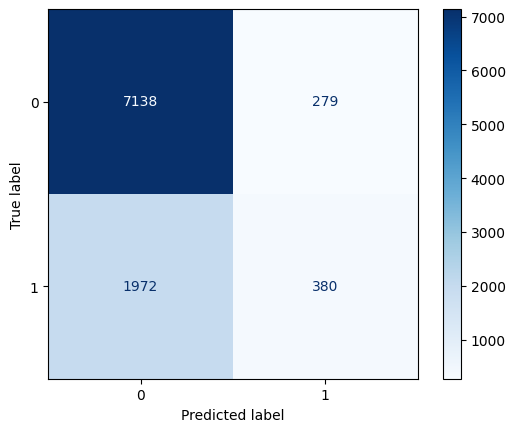

In [13]:
# Plot Confusion matrix
classes = None
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')


In [14]:
print("Baseline metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

Baseline metrics:
- Accuracy  = 0.770
- ROC AUC   = 0.562
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7417
           1       0.58      0.16      0.25      2352

    accuracy                           0.77      9769
   macro avg       0.68      0.56      0.56      9769
weighted avg       0.73      0.77      0.72      9769



-----------------------------------------------------------------------
**Now, let's build your model with feature selection.**
-----------------------------------------------------------------------

In [15]:
RAND=2106 ## Student ID abcde

#Task 2. Features transformation by t-SNE for visualisation purpose

2.1 Apply T-SNE to trasform the data into 2D space, use "random_state=RAND". See example: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html





[Text(0.5, 1.0, 'Adult data t-SNE projection')]

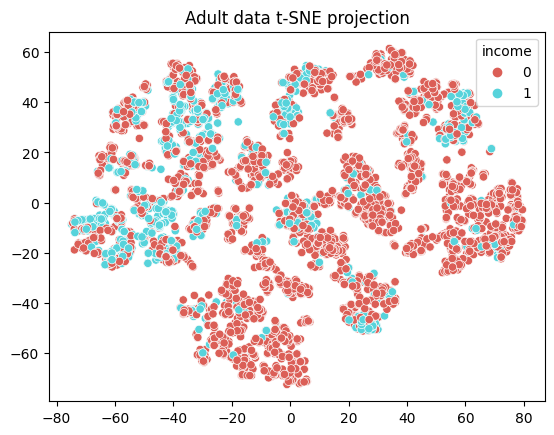

In [16]:
from sklearn.manifold import TSNE
sklearn_tsne = TSNE(n_components=2, random_state=RAND)

X_test_tsne=sklearn_tsne.fit_transform(X_test[:5000,:])
import seaborn as sns
sns.scatterplot(x=X_test_tsne[:5000,0], y=X_test_tsne[:5000,1], hue=y_test[:5000],
                palette=sns.color_palette("hls", 2)).set(title="Adult data t-SNE projection")

#Task 3. Features transformation by linear PCA.

3.1 Apply Linear PCA to trasform the data into 2D space, use "random_state=RAND". See example: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

3.2 Applay PCA transformation to train and test sets. Train the classifier and enaluate the accuracy


[Text(0.5, 1.0, 'Adult data PCA projection')]

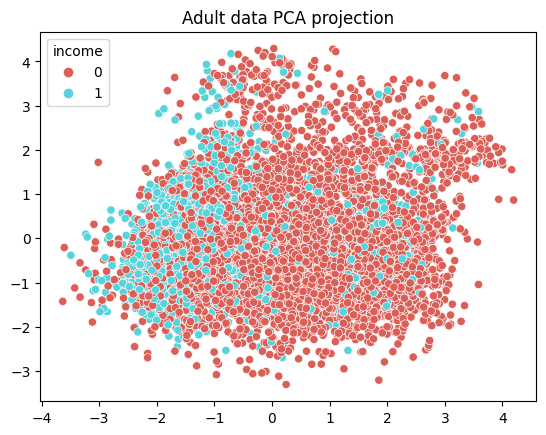

In [17]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2, random_state=RAND)
X_train_pca=sklearn_pca.fit_transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_test, palette=sns.color_palette("hls", 2)).set(title="Adult data PCA projection")


In [18]:
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
scores_pca=metrics.accuracy_score(y_test,y_pred)
print("linear-PCA features accuracy = ", scores_pca)


linear-PCA features accuracy =  0.7592384072064694


#Task 3. features trasformation by KernelPCA.

Student ID [abcde]

If e=[0,1] use kernel='linear'

If e=[2,3] use kernel='poly'

If e=[4,5] use kernel='rbf'

If e=[6,7] use kernel='sigmoid'

If e=[8,9] use kernel='cosine'

3.1 Select best number of features from n_components=1 to 9 with the best test set classification accuracy.
3.2 Plot accuracy graph Accuracy vs number of Principal Componentes (n_components).
see examplel: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_3-nonlinear-mappings-via-kernel-principal-component-analysis.php

P.s. due to big number of data, the calculations may take up to 20min.

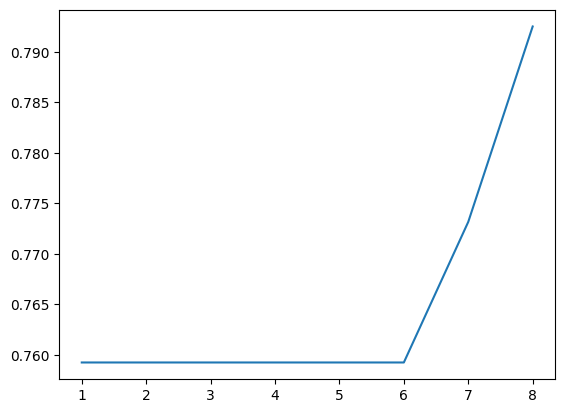

In [12]:
from sklearn.decomposition import KernelPCA
scores=[]
for i in range(1,9):
  sklearn_pca = KernelPCA (n_components=i, kernel="sigmoid", gamma=15)
  X_train_pca = sklearn_pca.fit_transform(X_train)
  X_test_pca  = sklearn_pca.transform(X_test)
  model.fit(X_train_pca, y_train)
  y_pred = model.predict(X_test_pca)
  scores_base = metrics.accuracy_score(y_test,y_pred)
  scores.append(scores_base)

plt.plot(range(1,9), scores)

#Task 4. Print classifications results: with all features; by 2 linear-PCA and with best reduced by Kernel PCA



In [14]:
print("Scores with all features:              ", scores_baseline)
print("Scores with 2 linear-PCA:               0.7592384072064694")
print("Scores with best reduced by Kernel PCA:", scores[7])

Scores with all features:               0.7695772341078924
Scores with 2 linear-PCA:               0.7592384072064694
Scores with best reduced by Kernel PCA: 0.7925069096120381


##As a conclusion - review the results and compare them with feature selection methods in assignment 3. I.e. How many features is enough? Which one is easier to interpret? Which one gives the best accuracy.

By using the method best reduced by Kernel PCA we got the best results, which are even better than the feature selection methods used in assignment 3. Which means having 8 features is enough. Also, having less features allows us to interpret our model more easily.
